In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Load the image

In [2]:
img = plt.imread('../hw2/data/IMG_1878.JPG')

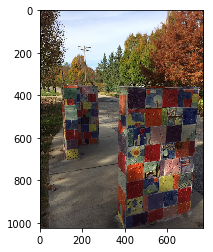

In [4]:
plt.imshow(img);

In [5]:
X_red = img[:,:,0]
X_green = img[:,:,1]
X_blue = img[:,:,2]

## Plot all channels
 - R, G, B Channels

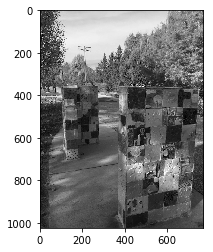

In [7]:
plt.imshow(X_red,cmap=plt.cm.gray);

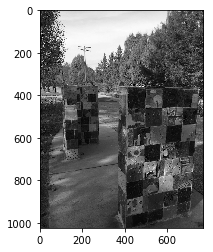

In [9]:
plt.imshow(X_green,cmap=plt.cm.gray);

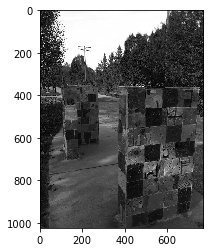

In [11]:
plt.imshow(X_blue,cmap=plt.cm.gray);

In [12]:
img.shape

(1024, 768, 3)

In [13]:
X_red.shape

(1024, 768)

In [77]:
def create_patches(image,w,k) :
    """
    
        Function to generate patches
        
        Parameters : 
        ------------------------------
        
        @input : 
            image : input image R,G,B
            w  : window size, number of consecutive rows to pick 
            k : number of patches to generate per channel
            
        @output : all patches horizontally stacked together.
        
        -----------------------------
    
    """
    arr = [image[:,:,0],image[:,:,1],image[:,:,2]]
    
    out = None
    
    for i in range(k) : 
        for X_img in arr : 
            rand = np.random.randint(X_img.shape[0]-w)
            patch = X_img[rand:rand+w,:]
            if out is None : 
                out = patch 
            else : 
                out = np.hstack([out,patch])
    return out

In [47]:
data_small = create_patches(img,8,3)

In [48]:
data_large = create_patches(img,8,30)

In [49]:
def power_iteration(matrix) : 
    """
        Power iteration implementation
        
        Paramters :
        ------------------------------------
        
        @input : Covariance matrix 
        
        @output : first eigen vector
        
        ------------------------------------
    """
    if matrix is None: 
        return 
    else : 
        threshold = 1e-5
        x0 = np.random.randn(matrix.shape[0])
        no_iterations = 0 
        while True : 
            no_iterations +=1 
            x1 = np.dot(matrix, x0)
            norm = np.linalg.norm(x1)
            x1 = x1 / norm 
            if no_iterations % 1000 == 0 : 
                print(no_iterations, np.linalg.norm(x1 - x0))
            if np.linalg.norm(x1 - x0) < threshold : 
                break 
            else : 
                x0 = x1
        print('No. iterations performed : {}'.format(no_iterations))
        return x1

In [50]:
def covariance(a,b) : 
    """
        Function to calculate covariance between a,b
        
        Parameters : 
        ----------------------------------------------
        
        @input : a,b
        
        ----------------------------------------------
        
    """
    if len(a) != len(b) : 
        return 
    return np.sum((a-np.mean(a)).dot(b-np.mean(b))/(len(a)-1))

## Generate Eigen Vectors for small patch 
  - 3 patches per channel --> 9 patches total 
  - 8 eigen vectors

In [68]:
cov_len = data_small.shape[0]
cov_small = np.zeros((cov_len,cov_len))
for i in range(cov_len): 
    for j in range(cov_len):
        cov_small[i][j] = covariance(data_small[i],data_small[j])

In [69]:
def calculate_eigenvectors(cov_m , k) : 
    
    """
        Function to generate k-eigen vectors 
        
        Paramters : 
        -----------------------------------------
        
        @input :  k - number of eigen vectors 
    
        @output : set of eigen vectors - each row representing an eigen vector. 
        -----------------------------------------
    """
    if not k : 
        return 
    else : 
        
        eigen_vectors = None 
        
        for i in range(k) : 
            ev = power_iteration(cov_m)
            ev = ev.reshape((ev.shape[0],1))
            _lambda = np.linalg.norm(cov_m.dot(ev)) / np.linalg.norm(ev)
            if eigen_vectors is None : 
                eigen_vectors = ev 
            else : 
                eigen_vectors = np.hstack([eigen_vectors,ev])
            cov_m = cov_m - _lambda*ev.dot(ev.T)
        return eigen_vectors

In [72]:
ev_small = calculate_eigenvectors(cov_small,8)

No. iterations performed : 6
No. iterations performed : 35
No. iterations performed : 44
No. iterations performed : 60
No. iterations performed : 33
No. iterations performed : 31
No. iterations performed : 32
No. iterations performed : 2


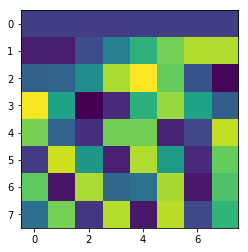

In [73]:
plt.imshow(ev_small.T)

## Generate Eigen Vectors for large patch
 - 30 patches per channel ==> 90 patches 
 - 8 eigen vectors

In [74]:
cov_len = data_large.shape[0]
cov_large = np.zeros((cov_len,cov_len))
for i in range(cov_len): 
    for j in range(cov_len):
        cov_large[i][j] = covariance(data_large[i],data_large[j])

In [75]:
ev_large = calculate_eigenvectors(cov_large,8)

No. iterations performed : 8
No. iterations performed : 25
No. iterations performed : 24
No. iterations performed : 51
No. iterations performed : 49
No. iterations performed : 35
No. iterations performed : 31
No. iterations performed : 2


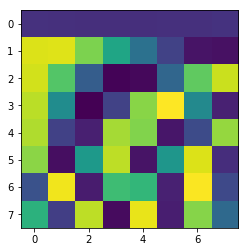

In [76]:
plt.imshow(ev_large.T)